# Extracting and visualizing stock data
Setup 

In [1]:
!pip install yfinance==0.2.20
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install pandas==2.0.2
!pip install requests==2.26.0
!pip install plotly==5.3.1
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.9.1
!pip install matplotlib

  Using cached yfinance-0.2.20-py2.py3-none-any.whl (62 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached frozendict-2.3.8-cp310-cp310-macosx_11_0_arm64.whl (35 kB)
  Using cached pandas-2.0.3-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-4.9.2.tar.gz (3.7 MB)
  Preparing metadata (setup.py) ... done
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached cryptography-41.0.1-cp37-abi3-macosx_10_12_universal2.whl (5.3 MB)
  Using cached numpy-1.25.0-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached certifi-2023.5.7-py3-none-any.whl (156 kB)
  Using cached charset_normalizer-3.1.0-cp310-cp310-macosx_11_0_arm64.whl (123 kB)
  Using cached urllib3-2.0.3-py3-none-any.whl (123 kB)
  DEPRECATI

  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: mamba
zsh:1: command not found: mamba
  Using cached lxml-4.9.1.tar.gz (3.4 MB)
  Preparing metadata (setup.py) ... done
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.2
    Uninstalling lxml-4.9.2:
      Successfully uninstalled lxml-4.9.2
  DEPRECATION: lxml is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for lxml ... done

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.7.1-cp310-cp310-m

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Question 1: use YFinance to extract Tesla data

In [3]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extract Teslas revenue data using webscraping
Extract the data from a webpage

In [4]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

parse the data with beautiful soup, display data with tail.

**Note!**, using `pd.concat`, because `append` is deprecated in Pandas 2 and higher.

In [10]:
soup = BeautifulSoup(html_data, 'html5lib')
tables = soup.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    header = table.find("th")
    if header.text == "Tesla Quarterly Revenue(Millions of US $)":
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                revenue = int(cols[1].text.replace("$", "").replace(",", "") + "0") // 10
                # using `pd.concat`, because `append` is deprecated in Pandas 2 and higher.
                new_row = pd.Series([cols[0].text, revenue], index = tesla_revenue.columns)
                tesla_revenue = pd.concat([tesla_revenue, new_row.to_frame().T], ignore_index=True)

tesla_revenue.tail()


,Date,Revenue
51,2010-06-30,28
52,2010-03-31,21
53,2009-12-31,0
54,2009-09-30,46
55,2009-06-30,27


## Question 3: Extract GameStop stock data using yfinance

In [11]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extract Gamestops revenue data using webscraping

In [16]:
url= "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

soup = BeautifulSoup(html_data, 'html5lib')
tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    header = table.find("th")
    if header.text == "GameStop Annual Revenue(Millions of US $)":
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                # using `pd.concat`, because `append` is deprecated in Pandas 2 and higher.
                revenue = int(cols[1].text.replace("$", "").replace(",", "") + "0") //10
                new_row = pd.Series([cols[0].text, revenue], index = gme_revenue.columns)
                gme_revenue = pd.concat([gme_revenue, new_row.to_frame().T], ignore_index=True)

gme_revenue.tail()

,Date,Revenue
10,2013,8887
11,2012,9551
12,2011,9474
13,2010,9078
14,2009,8806


## Setup for questions 5-6: make_graph

In [49]:
def make_graph(stock, price_data, revenue_data): 
    price_data['Date'] = pd.to_datetime(price_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    plt.figure(figsize=(14,7))

    plt.subplot(2, 1, 1)  # subplot 1
    plt.plot(price_data['Date'], price_data['Close'])
    plt.title(stock + ' Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.subplot(2, 1, 2)  # subplot 2
    plt.plot(revenue_data['Date'], revenue_data['Revenue'])
    plt.title(stock + ' Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue')

    plt.tight_layout()  # auto adjust the layout
    plt.show()

## Question 5: Plot Tesla Stock graph

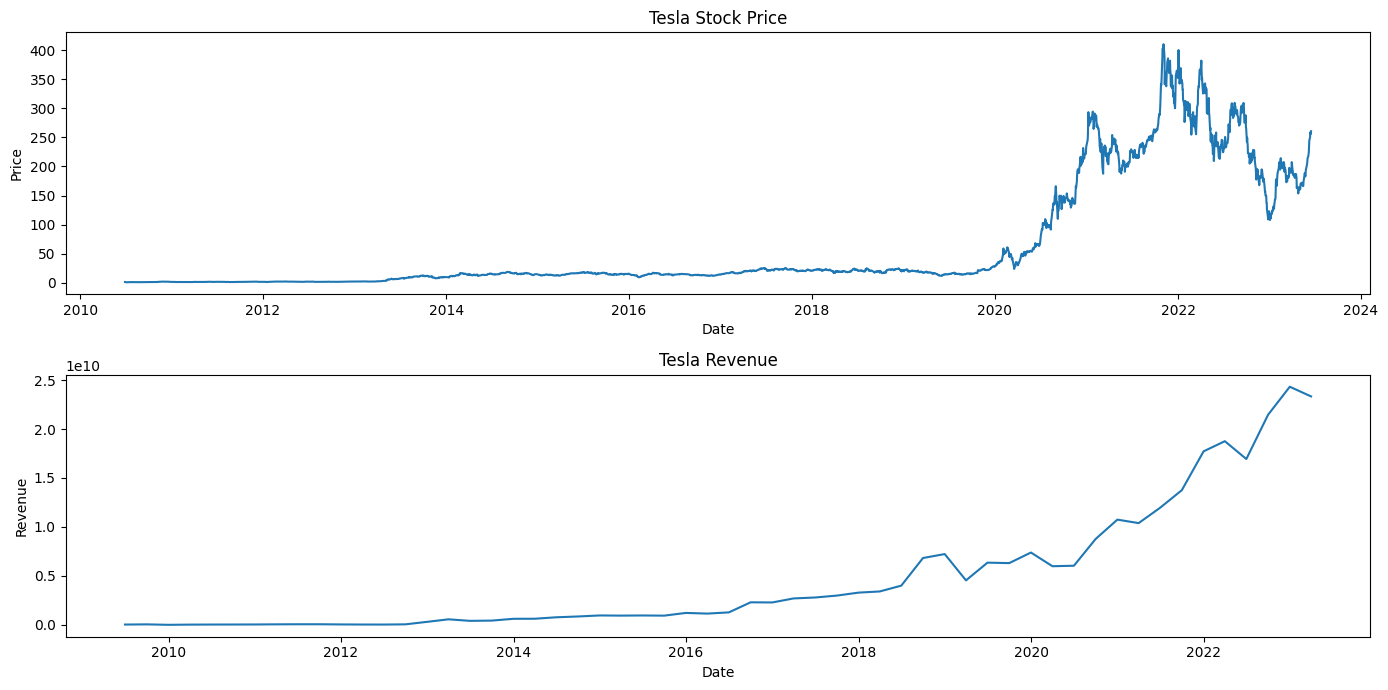

In [50]:
make_graph('Tesla', tesla_data,  tesla_revenue)

## Question 6: Plot Gamestop stock and revenue


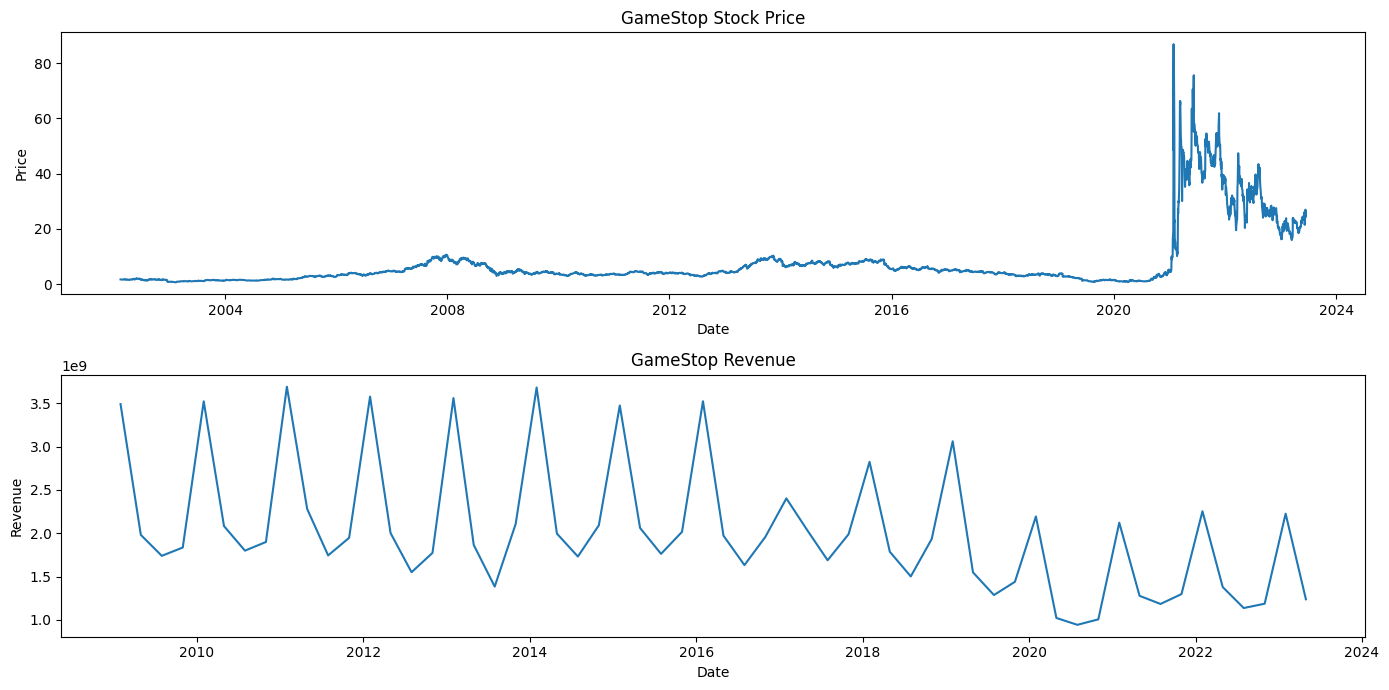

In [58]:
make_graph('GameStop', gme_data,  gme_revenue)